# Plotting

We will plot with 3 datasets this week. Let's load them. 

In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr  # IF NECESSARY, from terminal: pip install pandas_datareader
import seaborn as sns
from numpy.random import default_rng

# these three are used to open the CCM dataset:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

pd.set_option("display.max_rows", 10)  # display option for pandas
# more here: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

## Load macro_data

In [2]:
# LOAD DATA AND CONVERT TO ANNUAL

start = 1990 # pandas datareader can infer these are years
end = 2018
macro_data = pdr.data.DataReader(['CAUR','MIUR','PAUR', # unemployment 
                                  'LXXRSA','DEXRSA','WDXRSA', # case shiller index in LA, Detroit, DC (no PA  available!)
                                  'MEHOINUSCAA672N','MEHOINUSMIA672N','MEHOINUSPAA672N'], #  
                                 'fred', start, end)
macro_data = macro_data.resample('Y').first() # get's the first observation for each variable in a given year

# CLEAN UP THE FORMATING SOMEWHAT

macro_data.index = macro_data.index.year
macro_data.columns=pd.MultiIndex.from_tuples([
    ('Unemployment','CA'),('Unemployment','MI'),('Unemployment','PA'),
    ('HouseIdx','CA'),('HouseIdx','MI'),('HouseIdx','PA'),
    ('MedIncome','CA'),('MedIncome','MI'),('MedIncome','PA')
    ])



In [3]:
year_state_tall = macro_data.stack().reset_index().rename(columns={'level_1':'state'}).sort_values(['state','DATE'])    

year_state_wide = macro_data

# one level names
year_state_wide.columns=[
    'Unemployment_CA','Unemployment_MI','Unemployment_PA',
    'HouseIdx_CA','HouseIdx_MI','HouseIdx_PA',
    'MedIncome_CA','MedIncome_MI','MedIncome_PA'
    ]

## And load CCM data

First, load the data

In [4]:
url = 'https://github.com/LeDataSciFi/ledatascifi-2023/blob/main/data/CCM_cleaned_for_class.zip?raw=true'

#firms = pd.read_stata(url)   
# <-- that code would work, but GH said it was too big and
# forced me to zip it, so here is the work around to download it:

with urlopen(url) as request:
    data = BytesIO(request.read())

with ZipFile(data) as archive:
    with archive.open(archive.namelist()[0]) as stata:
        ccm = pd.read_stata(stata)

## Sidebar: Here's a fun EDA hack:

https://ydata-profiling.ydata.ai/docs/master/index.html

Notes
- Slow with huge datasets (see webpage 
- Doesn't work with multiindex column names (must be "one level")

In [5]:
# install new package (run this one time only)
# !pip install -U ydata-profiling

# i got an error towards the end but it still installed...

In [6]:
# this package used to be called pandas-profiling
# new name, better performance (speed and features)
# from ydata_profiling import ProfileReport

# create the report:
# profile = ProfileReport(macro_data, title="Pandas Profiling Report")
# profile.to_file("macro_data_report.html")



In [7]:
year_state_wide

,Unemployment_CA,Unemployment_MI,Unemployment_PA,HouseIdx_CA,HouseIdx_MI,HouseIdx_PA,MedIncome_CA,MedIncome_MI,MedIncome_PA
DATE,,,,,,,,,
1990,5.2,7.7,5.2,100.471193,NaN,93.362855,67118.0,60358.0,58479.0
1991,7.1,8.8,6.5,95.569015,58.420806,89.706871,65490.0,62480.0,59076.0
1992,8.6,9.5,7.4,92.786926,59.748947,88.573807,66253.0,61249.0,56722.0
1993,9.8,7.6,7.2,85.246295,61.564205,89.065118,63086.0,60474.0,57387.0
1994,9.3,7.2,6.7,77.395052,64.526663,88.988467,64078.0,63992.0,58156.0
...,...,...,...,...,...,...,...,...,...
2014,8.2,8.1,6.5,216.555387,95.260332,206.958953,69292.0,59575.0,63204.0
2015,6.8,6.0,5.5,228.245834,98.235583,208.698728,72774.0,61986.0,69061.0
2016,5.7,4.9,5.3,243.470477,104.897797,212.097753,75235.0,64458.0,68847.0


In [8]:
year_state_tall

,DATE,state,HouseIdx,MedIncome,Unemployment
0,1990,CA,100.471193,67118.0,5.2
3,1991,CA,95.569015,65490.0,7.1
6,1992,CA,92.786926,66253.0,8.6
9,1993,CA,85.246295,63086.0,9.8
12,1994,CA,77.395052,64078.0,9.3
...,...,...,...,...,...
74,2014,PA,206.958953,63204.0,6.5
77,2015,PA,208.698728,69061.0,5.5
80,2016,PA,212.097753,68847.0,5.3
83,2017,PA,218.231083,67736.0,5.2


From the `year_state` data (wide or tall):

_("unemployment changes": Focus on the change in the _level_ (raw difference, not percent change) of unemployment from one year compared the prior year.)_

- Q0. How has median income has evolved over time for PA?
    - Demos...
- Q1. How has *unemployment changes* evolved over time for PA?   
- Q2. What is the distribution of unemployment changes for all states (view as one var)?   
- Q3. What is the distribution of unemployment changes for all states (separately)?
- Q4. How does unemployment changes vary with median income growth?

From the `ccm` data:

- Q5. Plot the distribution of R&D (`xrd_a`). Bonuses:
    - deal with outliers
    - add a title
    - change the x and y axis titles
- Q6: Compare R&D and CAPX. Bonuses:
    - don't plot outliers
    - avoid oversaturated plot

<AxesSubplot: xlabel='DATE'>

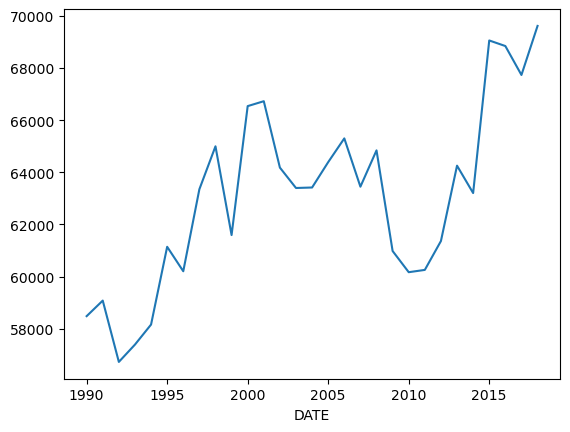

In [9]:
year_state_wide['MedIncome_PA'].plot()

<AxesSubplot: xlabel='DATE', ylabel='MedIncome_PA'>

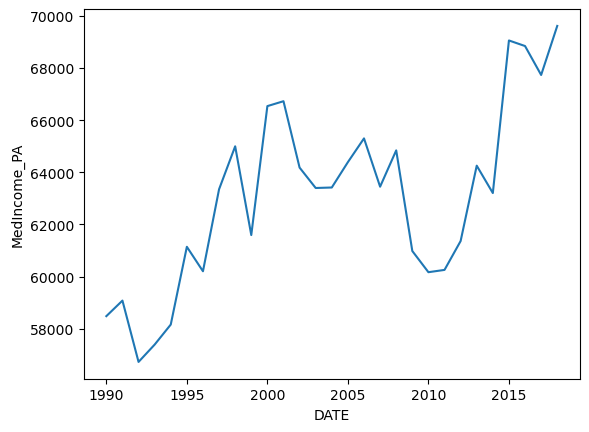

In [10]:
sns.lineplot(data=year_state_wide['MedIncome_PA']) # sns from the wide

<AxesSubplot: xlabel='DATE', ylabel='MedIncome'>

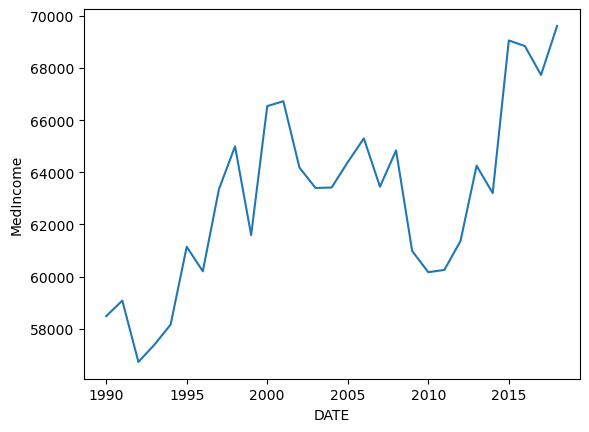

In [11]:
# sns from the tall version

sns.lineplot(data=year_state_tall.query('state == "PA" '),
             x='DATE',
             y='MedIncome')

In [12]:
# q1
# lineplot, but need CHANGE in une

<AxesSubplot: xlabel='DATE'>

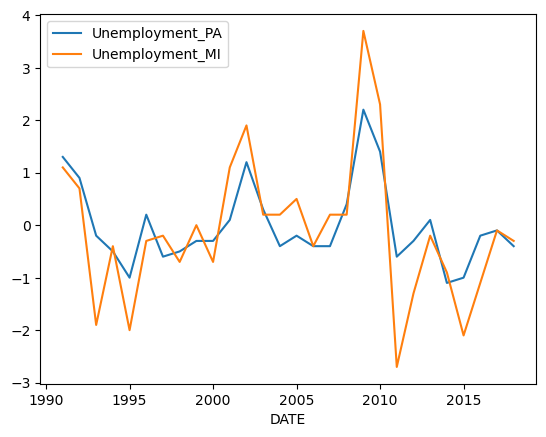

In [15]:
year_state_wide[['Unemployment_PA','Unemployment_MI']].diff().plot()

In [16]:
year_state_tall['une_diff'] = year_state_tall['Unemployment'].diff()

<AxesSubplot: xlabel='DATE', ylabel='une_diff'>

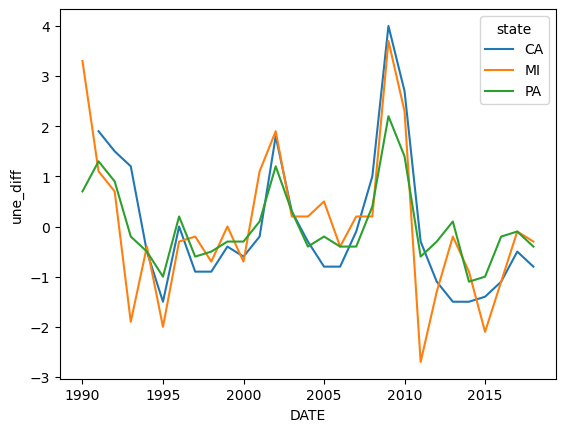

In [19]:
sns.lineplot(data=year_state_tall,
             x='DATE',
             y='une_diff',
            hue='state')